In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
#import pbs
import sys
import math
import time
import random

from tqdm import tqdm
from pprint import pprint
from pathlib import Path

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import f1_score, classification_report


import seaborn as sns; sns.set(style='ticks', font='serif')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''


Mounted at /content/gdrive


In [2]:
import os
print(os.getcwd())

C:\Users\SASTRA


In [3]:
import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('ANN_model_oversampling_15_04_2024_testing.keras')

# Show the model architecture
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 16)                304       
                                                                 
 dense_2 (Dense)             (None, 14)                238       
                                                                 
 dense_3 (Dense)             (None, 12)                180       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 8)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                

1913/1913 [==============================] - 3s 2ms/step
The count of 1s 22472
The count of 0s 38743
C:\Users\SASTRA
              precision    recall  f1-score   support

           0       1.00      0.63      0.78     61185
           1       0.00      0.50      0.00        30

    accuracy                           0.63     61215
   macro avg       0.50      0.57      0.39     61215
weighted avg       1.00      0.63      0.77     61215



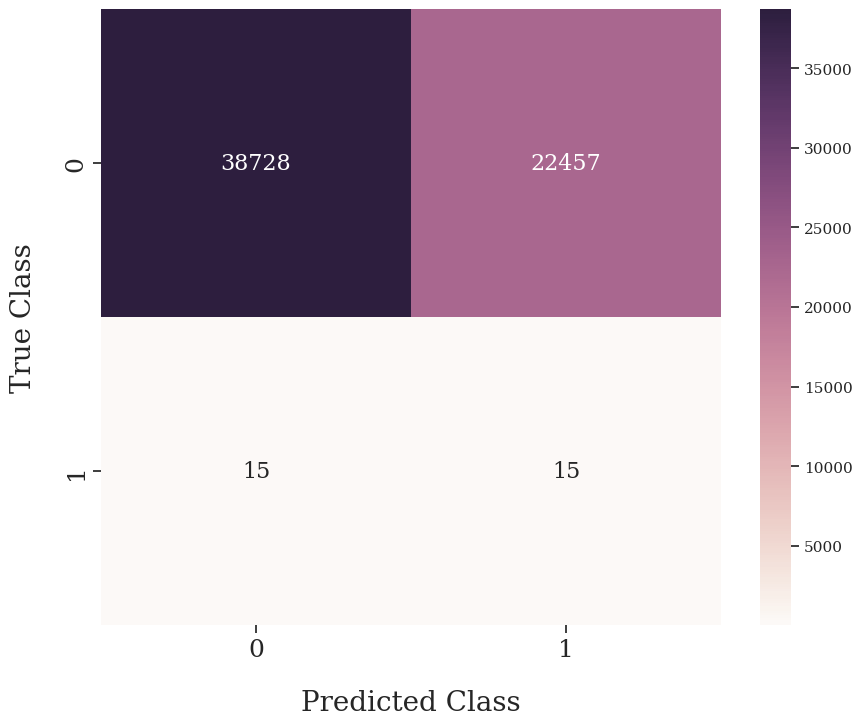

In [3]:
#data_dir1 = "/content/gdrive/MyDrive/Colab Notebooks/Updated_TF_2/"  ## enter path for the test file##
df = pd.read_csv("LARP_NS5A_test_df.csv")

df_x = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value", "ecc.m$value", "ecmi.m$value", "ecp.m$value", "ecp1.m$value", "ecp2.m$value", "ehcm.m$value", "ersa.m$value", "escm.m$value", "essp.m$value"]])

df_y=(df[["inf.m$value"]])

cls = [str(v) for v in sorted(df['inf.m$value'].unique())]
cls


xtest = np.array(df_x)

scaler = StandardScaler().fit(xtest)
rescaledX = scaler.transform(xtest)
rsc_xtest = scaler.transform(xtest)


ypred = new_model.predict(rsc_xtest)

threshold=0.5
predicted_proba = new_model.predict(rsc_xtest)
li=[]



for i in predicted_proba:
    if i>=0.5:
        li.append(1)
    else:
        li.append(0)

print("The count of 1s",li.count(1))
print("The count of 0s",li.count(0))


import pandas as pd

range1 = 265
range2 = 231

data = {
    'proteinA': [i for i in range(1, range1 + 1) for _ in range(range2)],
    'proteinB': list(range(1, range2 + 1)) * range1
}

df = pd.DataFrame(data)

df.to_csv("prediction_test_over_16_04_2024.csv")


predicted = pd.DataFrame(li, columns=['prediction'])

#predicted.shape
#df_merged = df.append(predicted)

#df_merged.shape

df1= pd.concat([df, predicted,df_y], axis=1)

df1.shape

df1.to_csv('prediction_test_16_04_2024_over_4U0A.csv')

import os

print(os.getcwd())

predicted = pd.DataFrame(li, columns=['prediction'])
predicted.to_csv('prediction_test_4U0A_16-04-2024.csv')

y_pred=np.array(predicted)
y_test=np.array(df_y)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 16}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=20, labelpad=20)
plt.ylabel("True Class", fontsize=20, labelpad=20)
plt.show()

1365/1365 [==============================] - 2s 1ms/step
The count of 1s 16434
The count of 0s 27225
C:\Users\SASTRA
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     43639
           1       0.00      0.35      0.00        20

    accuracy                           0.62     43659
   macro avg       0.50      0.49      0.38     43659
weighted avg       1.00      0.62      0.77     43659



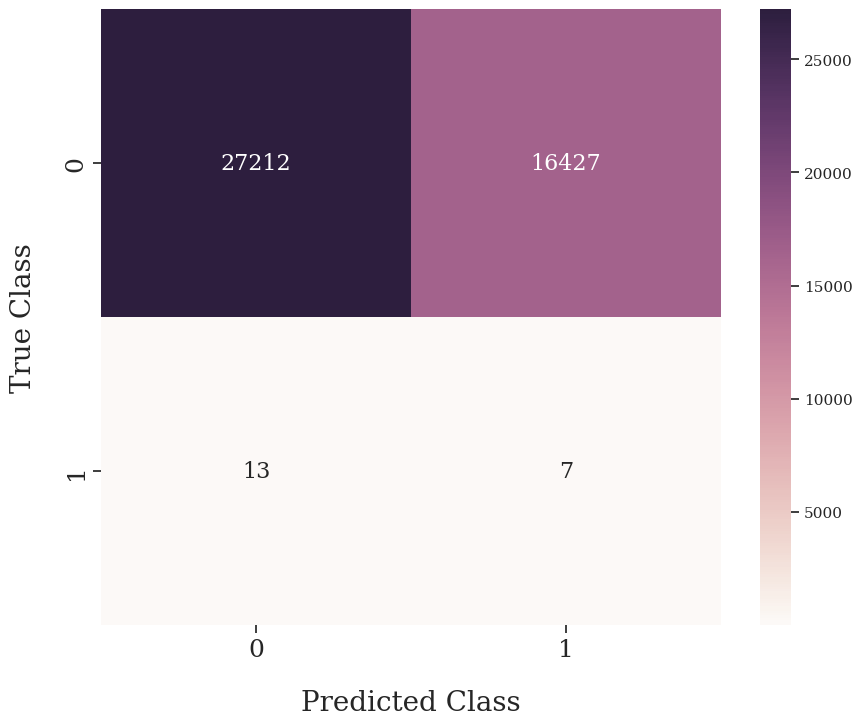

In [4]:
#data_dir1 = "/content/gdrive/MyDrive/Colab Notebooks/Updated_TF_2/"  ## enter path for the test file##
df = pd.read_csv("4U0C_test_df.csv")

df_x = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value", "ecc.m$value", "ecmi.m$value", "ecp.m$value", "ecp1.m$value", "ecp2.m$value", "ehcm.m$value", "ersa.m$value", "escm.m$value", "essp.m$value"]])

df_y=(df[["inf.m$value"]])

cls = [str(v) for v in sorted(df['inf.m$value'].unique())]
cls


xtest = np.array(df_x)

scaler = StandardScaler().fit(xtest)
rescaledX = scaler.transform(xtest)
rsc_xtest = scaler.transform(xtest)


ypred = new_model.predict(rsc_xtest)

threshold=0.5
predicted_proba = new_model.predict(rsc_xtest)
li=[]



for i in predicted_proba:
    if i>=0.5:
        li.append(1)
    else:
        li.append(0)

print("The count of 1s",li.count(1))
print("The count of 0s",li.count(0))


import pandas as pd

range1 = 189
range2 = 231

data = {
    'proteinA': [i for i in range(1, range1 + 1) for _ in range(range2)],
    'proteinB': list(range(1, range2 + 1)) * range1
}

df = pd.DataFrame(data)

df.to_csv("prediction_test_over_16_04_2024_4u0c.csv")


predicted = pd.DataFrame(li, columns=['prediction'])

#predicted.shape
#df_merged = df.append(predicted)

#df_merged.shape

df1= pd.concat([df, predicted,df_y], axis=1)

df1.shape

df1.to_csv('prediction_test_16_04_2024_over_4U0C.csv')

import os

print(os.getcwd())

predicted = pd.DataFrame(li, columns=['prediction'])
predicted.to_csv('prediction_test_4U0C_16-04-2024.csv')

y_pred=np.array(predicted)
y_test=np.array(df_y)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 16}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=20, labelpad=20)
plt.ylabel("True Class", fontsize=20, labelpad=20)
plt.show()

2364/2364 [==============================] - 4s 2ms/step
The count of 1s 30660
The count of 0s 44965
C:\Users\SASTRA
              precision    recall  f1-score   support

           0       1.00      0.59      0.75     75565
           1       0.00      0.48      0.00        60

    accuracy                           0.59     75625
   macro avg       0.50      0.54      0.37     75625
weighted avg       1.00      0.59      0.75     75625



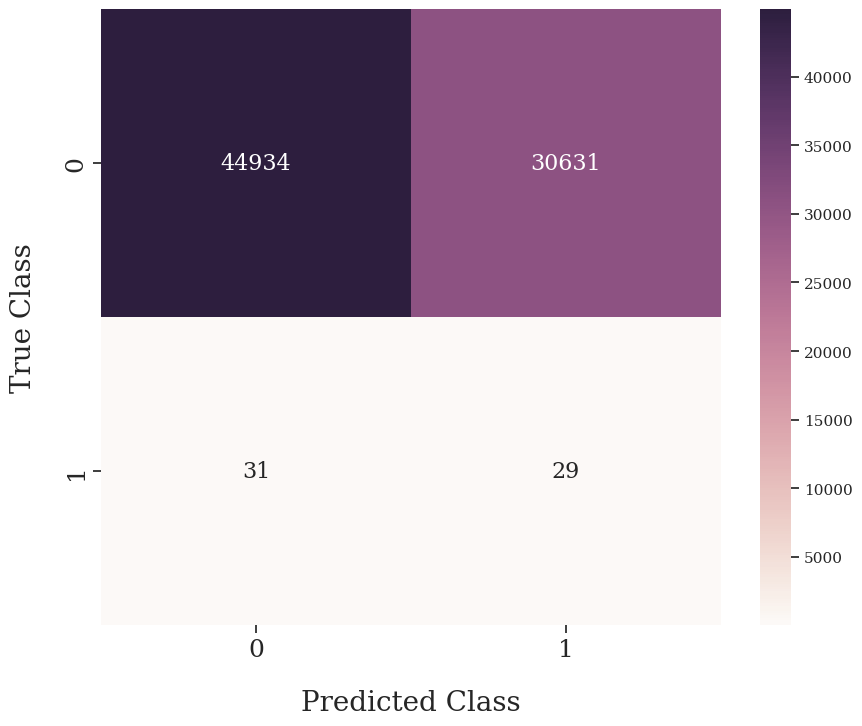

In [5]:
#data_dir1 = "/content/gdrive/MyDrive/Colab Notebooks/Updated_TF_2/"  ## enter path for the test file##
df = pd.read_csv("1Q94_test_df.csv")

df_x = (df[["cmi.m$value","cc.m$value","cp.m$value","cp1.m$value", "cp2.m$value","hcm.m$value","rsa.m$value",
            "scm.m$value","ssp.m$value", "ecc.m$value", "ecmi.m$value", "ecp.m$value", "ecp1.m$value", "ecp2.m$value", "ehcm.m$value", "ersa.m$value", "escm.m$value", "essp.m$value"]])

df_y=(df[["inf.m$value"]])

cls = [str(v) for v in sorted(df['inf.m$value'].unique())]
cls


xtest = np.array(df_x)

scaler = StandardScaler().fit(xtest)
rescaledX = scaler.transform(xtest)
rsc_xtest = scaler.transform(xtest)


ypred = new_model.predict(rsc_xtest)

threshold=0.5
predicted_proba = new_model.predict(rsc_xtest)
li=[]



for i in predicted_proba:
    if i>=0.5:
        li.append(1)
    else:
        li.append(0)

print("The count of 1s",li.count(1))
print("The count of 0s",li.count(0))


import pandas as pd

range1 = 275
range2 = 275

data = {
    'proteinA': [i for i in range(1, range1 + 1) for _ in range(range2)],
    'proteinB': list(range(1, range2 + 1)) * range1
}

df = pd.DataFrame(data)

df.to_csv("prediction_test_over_16_04_2024_1Q94.csv")


predicted = pd.DataFrame(li, columns=['prediction'])

#predicted.shape
#df_merged = df.append(predicted)

#df_merged.shape

df1= pd.concat([df, predicted,df_y], axis=1)

df1.shape

df1.to_csv('prediction_test_16_04_2024_over_1Q94.csv')

import os

print(os.getcwd())

predicted = pd.DataFrame(li, columns=['prediction'])
predicted.to_csv('prediction_test_1Q94_16-04-2024.csv')

y_pred=np.array(predicted)
y_test=np.array(df_y)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cls))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cmap = sns.cubehelix_palette(light=0.98, as_cmap=True)
unsuv_cm = pd.DataFrame(cm)
sns.heatmap(unsuv_cm, annot=True,annot_kws={"size": 16}, cmap=cmap, fmt='d')# font size
plt.xlabel("Predicted Class", fontsize=20, labelpad=20)
plt.ylabel("True Class", fontsize=20, labelpad=20)
plt.show()